In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

In [4]:
np.random.rand(100) * 3 * np.pi / 2 - 0.5

array([ 1.26497873,  3.98013562,  2.94944019,  2.32111164,  0.23522052,
        0.23510686, -0.22628743,  3.58175892,  2.33268776,  2.83671341,
       -0.40299786,  4.0705925 ,  3.42279353,  0.50062449,  0.35682997,
        0.36427339,  0.93370779,  1.97285643,  1.53549295,  0.87238499,
        2.38328884,  0.15734933,  0.87669922,  1.22643951,  1.64917917,
        3.20005455,  0.44094053,  1.9232727 ,  2.29168789, -0.28110759,
        2.36298767,  0.303576  , -0.19345159,  3.97151775,  4.05043375,
        3.30948276,  0.93545857, -0.03973101,  2.72437217,  1.57416976,
        0.07509163,  1.83346621, -0.33794791,  3.78507144,  0.71947193,
        2.62206271,  0.96890384,  1.95076281,  2.0763115 ,  0.3711061 ,
        4.06905992,  3.15272738,  3.92728446,  3.71677455,  2.31753727,
        3.84422999, -0.08298891,  0.42354748, -0.28687142,  1.03308307,
        1.33159858,  0.77870219,  3.40533351,  1.18116045,  0.82387269,
        2.05739504,  0.16408976,  3.28026421, -0.14868837,  4.15

In [12]:
m = 100
angles = np.random.rand(m) * 3 * np.pi / 2 - 0.5
data = np.empty((m, 3))
data[:, 0] = np.cos(angles) + np.sin(angles) / 2 + 0.1 * np.random.randn(m) / 2
data[:, 1] = np.sin(angles) * 0.7 + 0.1 * np.random.randn(m) / 2
data[:, 2] = data[:, 0] * 0.1 + data[:, 1] + 0.3 + 0.1 * np.random.randn(m)
data.shape

(100, 3)

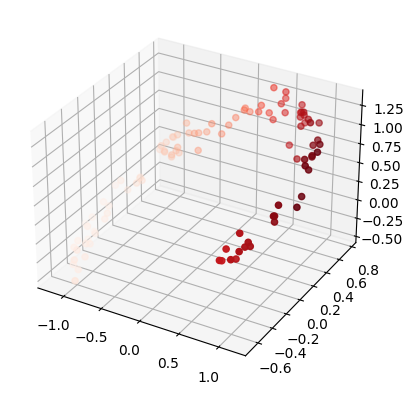

In [14]:
X_train = data

ax = plt.axes(projection='3d')
ax.scatter3D(X_train[:, 0], X_train[:, 1], X_train[:, 2], c=X_train[:, 0], cmap='Reds')

In [15]:
encoder = keras.models.Sequential([keras.layers.Dense(2, input_shape=(3, ))])
decoder = keras.models.Sequential([keras.layers.Dense(3, input_shape=(2, ))])
autoencoder = keras.models.Sequential([encoder, decoder])

2023-07-13 08:12:04.891782: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1639] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 6638 MB memory:  -> device: 0, name: GeForce RTX 2070 SUPER, pci bus id: 0000:3f:00.0, compute capability: 7.5


In [35]:
autoencoder.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 2)                 8         
                                                                 
 sequential_1 (Sequential)   (None, 3)                 9         
                                                                 
Total params: 17 (68.00 Byte)
Trainable params: 17 (68.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [16]:
autoencoder.compile(loss='mse', optimizer=keras.optimizers.SGD(learning_rate=0.1))

In [17]:
history = autoencoder.fit(X_train, X_train, epochs=200)

Epoch 1/200


2023-07-13 08:13:30.668511: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7f64546cbec0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-07-13 08:13:30.668549: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): GeForce RTX 2070 SUPER, Compute Capability 7.5
2023-07-13 08:13:30.891241: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:432] Loaded cuDNN version 8600
2023-07-13 08:13:30.989656: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


4/4 [==============================] - 2s 8ms/step - loss: 0.2579
Epoch 2/200
4/4 [==============================] - 0s 6ms/step - loss: 0.1871
Epoch 3/200
4/4 [==============================] - 0s 5ms/step - loss: 0.1527
Epoch 4/200
4/4 [==============================] - 0s 5ms/step - loss: 0.1350
Epoch 5/200
4/4 [==============================] - 0s 5ms/step - loss: 0.1200
Epoch 6/200
4/4 [==============================] - 0s 5ms/step - loss: 0.1071
Epoch 7/200
4/4 [==============================] - 0s 5ms/step - loss: 0.1004
Epoch 8/200
4/4 [==============================] - 0s 4ms/step - loss: 0.0967
Epoch 9/200
4/4 [==============================] - 0s 5ms/step - loss: 0.0918
Epoch 10/200
4/4 [==============================] - 0s 5ms/step - loss: 0.0886
Epoch 11/200
4/4 [==============================] - 0s 4ms/step - loss: 0.0858
Epoch 12/200
4/4 [==============================] - 0s 5ms/step - loss: 0.0841
Epoch 13/200
4/4 [==============================] - 0s 6ms/step - loss: 0

In [18]:
encodings = encoder.predict(X_train)
encodings.shape

4/4 [==============================] - 0s 4ms/step


(100, 2)

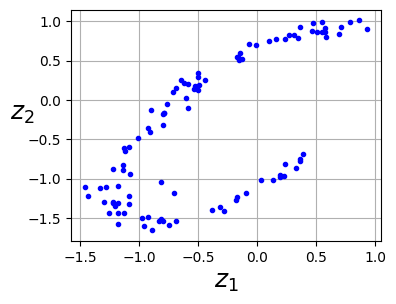

In [36]:
plt.figure(figsize=(4, 3))
plt.plot(encodings[:, 0], encodings[:, 1], 'b.')
plt.xlabel('$z_1$', fontsize=18)
plt.ylabel('$z_2$', fontsize=18, rotation=0)
plt.grid()

In [24]:
decodings = decoder.predict(encodings)
decodings.shape

4/4 [==============================] - 0s 2ms/step


(100, 3)

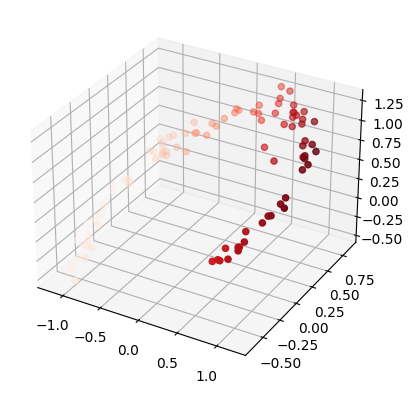

In [34]:
ax = plt.axes(projection='3d')
ax.scatter3D(decodings[:, 0], decodings[:, 1], decodings[:, 2], c=decodings[:, 0], cmap='Reds')